In [2]:
import os
os.chdir(r"C:/Users/lampu/DataAnalysis/")

import pandas as pd
import numpy as np

GoogleApps = pd.read_csv("googleplaystore.csv", sep=",")

FileNotFoundError: [Errno 2] No such file or directory: 'googleplaystore.csv'

# Анализ и обработка набора

In [172]:
GoogleApps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [173]:
print(GoogleApps.shape)

(10841, 13)


In [174]:
print(len(GoogleApps))

10841


In [175]:
GoogleApps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [176]:
GoogleApps.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
GoogleApps=GoogleApps[GoogleApps.Price != 'Everyone']
GoogleApps=GoogleApps.convert_dtypes()
GoogleApps["Price"] = GoogleApps["Price"].str.replace('$','')
GoogleApps["Price"] = GoogleApps["Price"].astype("float64")
GoogleApps["Reviews"] = GoogleApps["Reviews"].astype("int64", errors='raise')
GoogleApps=GoogleApps[GoogleApps.Installs != "0"]
GoogleApps=GoogleApps[GoogleApps.Installs != "0+"]
GoogleApps=GoogleApps[GoogleApps.Installs != "5+"]
GoogleApps=GoogleApps[GoogleApps.Installs != "1+"]
GoogleApps=GoogleApps[GoogleApps.Installs != "10+"]
GoogleApps=GoogleApps[GoogleApps.Installs != "100+"]
GoogleApps=GoogleApps[GoogleApps.Installs != "500+"]
GoogleApps=GoogleApps[GoogleApps.Installs != "50+"]
GoogleApps["Installs"] = GoogleApps["Installs"].str.replace(",", "")
GoogleApps["Installs"] = GoogleApps["Installs"].str.replace("\+", "")
GoogleApps["Installs"] = GoogleApps["Installs"].astype("int64")
GoogleApps["Installs"] = sorted(GoogleApps["Installs"])
GoogleApps["Installs"] = GoogleApps["Installs"].astype("str")
# GoogleApps["Installs"] = GoogleApps["Installs"].str.replace("000000000", "млрд")
# GoogleApps["Installs"] = GoogleApps["Installs"].str.replace("000000", "млн")
# GoogleApps["Installs"] = GoogleApps["Installs"].str.replace("000", "тыс")


In [178]:
GoogleApps.dtypes

App                string
Category           string
Rating            float64
Reviews             int64
Size               string
Installs           object
Type               string
Price             float64
Content Rating     string
Genres             string
Last Updated       string
Current Ver        string
Android Ver        string
dtype: object

In [179]:
GoogleApps.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9036,9036,8719.000000,9.036000e+03,9036,9036,9036,9036.000000,9036,9036,9036,9030,9034
unique,7869,33,NaN,NaN,403,13,2,NaN,6,115,1271,2584,31
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,1000000,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1671,NaN,NaN,1648,1579,8519,NaN,7133,698,314,1425,1947
mean,NaN,NaN,4.180422,5.328252e+05,NaN,NaN,NaN,0.902029,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.477696,3.199381e+06,NaN,NaN,NaN,15.546959,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,2.690000e+02,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,7.323000e+03,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,8.891100e+04,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [180]:
b=sorted(GoogleApps["Installs"].unique())

In [181]:
b

['1000',
 '10000',
 '100000',
 '1000000',
 '10000000',
 '100000000',
 '1000000000',
 '5000',
 '50000',
 '500000',
 '5000000',
 '50000000',
 '500000000']

# Построение гистограммы

In [182]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [183]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('Solarize_Light2')
%matplotlib inline

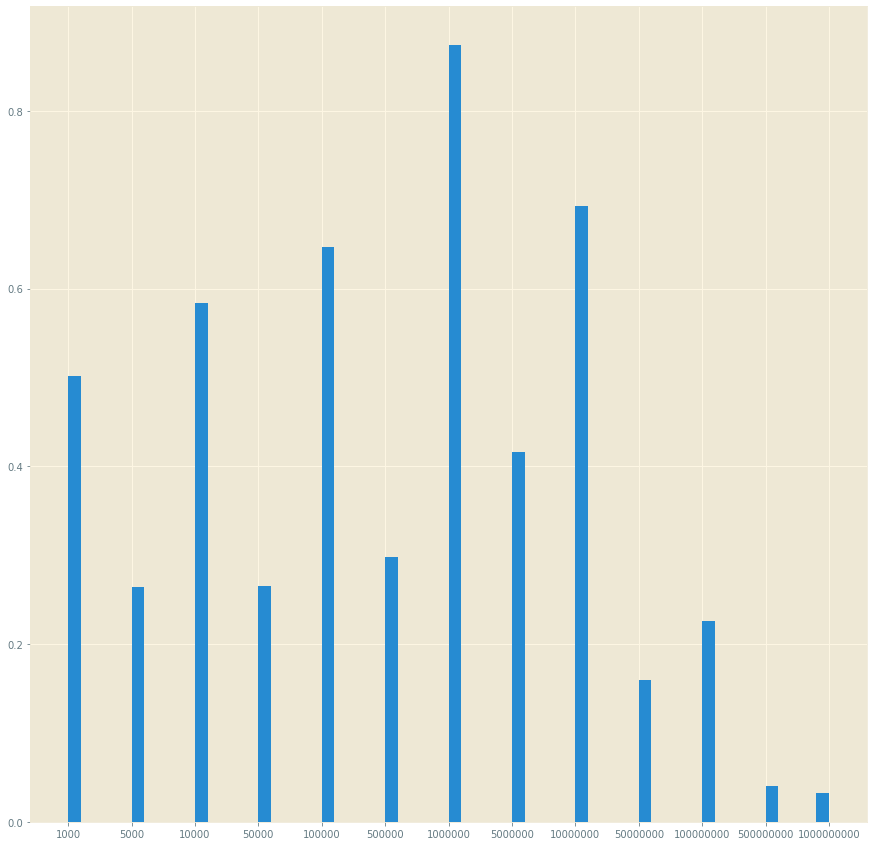

In [184]:
plt.figure(figsize=(15,15))
fig=GoogleApps["Installs"].hist(bins=60, density=True);